#Aggregate your data by Category

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
nasdaq=pd.read_csv('nasdaq-listings.csv')

In [3]:
nasdaq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Stock Symbol           1115 non-null   object 
 1   Company Name           1115 non-null   object 
 2   Last Sale              1115 non-null   float64
 3   Market Capitalization  1115 non-null   float64
 4   IPO Year               1115 non-null   object 
 5   Sector                 1115 non-null   object 
 6   Industry               1115 non-null   object 
 7   Last Update            1115 non-null   object 
dtypes: float64(2), object(6)
memory usage: 69.8+ KB


In [4]:
#group data by sector
nasdaq['market_cap_m']= nasdaq['Market Capitalization'].div(1e6)
nasdaq = nasdaq.drop('Market Capitalization',axis=1) #Drop column
nasdaq_by_sector = nasdaq.groupby('Sector') # Create groupby object
for sector,data in nasdaq_by_sector:
  print(sector,data.market_cap_m.mean())

Basic Industries 2092.7725206166665
Capital Goods 3693.104680289394
Consumer Durables 2732.097901041667
Consumer Non-Durables 8877.31880222
Consumer Services 11061.204255272833
Energy 2538.162505805263
Finance 3018.0067453908628
Health Care 5738.73807594492
Miscellaneous 8820.79468299412
NAN 2814.1867941734176
Public Utilities 5346.762634221429
Technology 20997.458241708067
Transportation 5614.412897396153


In [5]:
#keep it simple and Skip the loop
mcap_by_sector= nasdaq_by_sector.market_cap_m.mean()
mcap_by_sector

Sector
Basic Industries          2092.772521
Capital Goods             3693.104680
Consumer Durables         2732.097901
Consumer Non-Durables     8877.318802
Consumer Services        11061.204255
Energy                    2538.162506
Finance                   3018.006745
Health Care               5738.738076
Miscellaneous             8820.794683
NAN                       2814.186794
Public Utilities          5346.762634
Technology               20997.458242
Transportation            5614.412897
Name: market_cap_m, dtype: float64

Text(0.5, 0, 'USD mn')

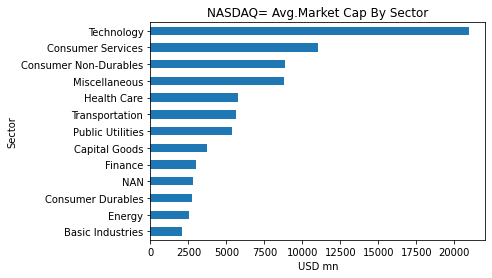

In [6]:
#Visualize Category Summaries
title= 'NASDAQ= Avg.Market Cap By Sector'
mcap_by_sector.sort_values(ascending=True).plot(kind='barh',title=title)
plt.xlabel('USD mn')

In [7]:
#aggregate Summary for all numeric Columns
nasdaq_by_sector.mean()

,Last Sale,market_cap_m
Sector,,
Basic Industries,48.873542,2092.772521
Capital Goods,50.771970,3693.104680
Consumer Durables,46.610000,2732.097901
Consumer Non-Durables,58.374143,8877.318802
Consumer Services,56.301904,11061.204255
Energy,33.387895,2538.162506
Finance,45.270279,3018.006745
Health Care,52.903770,5738.738076
Miscellaneous,108.524559,8820.794683


#More Ways to Aggregate Your Data

In [8]:
#Several Aggregations by Category
by_sector= nasdaq.groupby('Sector')
by_sector.market_cap_m.agg(['size','mean']).sort_values('size')

,size,mean
Sector,,
Energy,19,2538.162506
Basic Industries,24,2092.772521
Consumer Durables,24,2732.097901
Transportation,26,5614.412897
Public Utilities,28,5346.762634
Miscellaneous,34,8820.794683
Consumer Non-Durables,35,8877.318802
Capital Goods,66,3693.104680
NAN,79,2814.186794


In [9]:
#Several aggregation plus new labels
by_sector.market_cap_m.agg(['size','mean']).rename(columns={'size': '#obs','mean': 'Average'})

,#obs,Average
Sector,,
Basic Industries,24,2092.772521
Capital Goods,66,3693.104680
Consumer Durables,24,2732.097901
Consumer Non-Durables,35,8877.318802
Consumer Services,173,11061.204255
Energy,19,2538.162506
Finance,197,3018.006745
Health Care,187,5738.738076
Miscellaneous,34,8820.794683


In [10]:
#Different Statistics by Column
by_sector.agg({'market_cap_m':'size', 'IPO Year':'median'})

,market_cap_m,IPO Year
Sector,,
Basic Industries,24,1994.5
Capital Goods,66,1997.0
Consumer Durables,24,1998.0
Consumer Non-Durables,35,1996.0
Consumer Services,173,2003.0
Energy,19,2012.0
Finance,197,2005.0
Health Care,187,2011.0
Miscellaneous,34,2006.0


In [11]:
#Aggregate by two Categories
by_sector_year = nasdaq.groupby(['Sector','IPO Year'])
by_sector_year.market_cap_m.mean()

Sector            IPO Year
Basic Industries  1972         877.240005
                  1973        1445.697371
                  1986        1396.817381
                  1993        1933.224036
                  1996        5325.317586
                                 ...     
Transportation    2002        6914.854068
                  2006        2529.317235
                  2009         552.445919
                  2011        3711.638317
                  NAN         7358.862786
Name: market_cap_m, Length: 240, dtype: float64

In [12]:
#Select from MultiIndex
mcap_sector_year = by_sector_year.market_cap_m.mean()
mcap_sector_year.loc['Basic Industries']

IPO Year
1972     877.240005
1973    1445.697371
1986    1396.817381
1993    1933.224036
1996    5325.317586
2015     640.776045
NAN     1747.302056
Name: market_cap_m, dtype: float64

In [13]:
mcap_sector_year.loc[['Basic Industries', 'Transportation']]

Sector            IPO Year
Basic Industries  1972         877.240005
                  1973        1445.697371
                  1986        1396.817381
                  1993        1933.224036
                  1996        5325.317586
                  2015         640.776045
                  NAN         1747.302056
Transportation    1986        1446.557669
                  1991        6646.778622
                  1993        3474.796885
                  1996        1329.873667
                  1997        9681.791864
                  2002        6914.854068
                  2006        2529.317235
                  2009         552.445919
                  2011        3711.638317
                  NAN         7358.862786
Name: market_cap_m, dtype: float64

#Summary Statistics by Category with Seaborn

In [14]:
import seaborn as sns

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

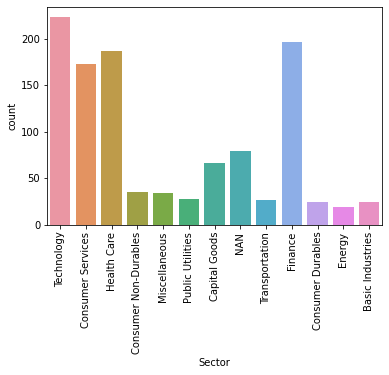

In [15]:
#basic Countplot
sns.countplot(x='Sector',data=nasdaq)
plt.xticks(rotation=90)

In [16]:
#countplot,sorted
sector_size= nasdaq.groupby('Sector').size()
order = sector_size.sort_values(ascending=False)
order.head()

Sector
Technology           223
Finance              197
Health Care          187
Consumer Services    173
NAN                   79
dtype: int64

In [17]:
order =order.index.tolist()

In [18]:
order

['Technology',
 'Finance',
 'Health Care',
 'Consumer Services',
 'NAN',
 'Capital Goods',
 'Consumer Non-Durables',
 'Miscellaneous',
 'Public Utilities',
 'Transportation',
 'Basic Industries',
 'Consumer Durables',
 'Energy']

Text(0.5, 1.0, '# Observations per Sector')

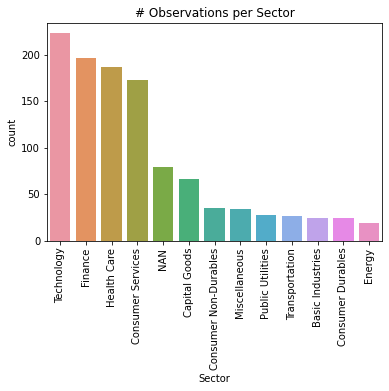

In [22]:
sns.countplot(x='Sector',data=nasdaq,order=order)
plt.xticks(rotation=90)
plt.title('# Observations per Sector')

<ipython-input-20-2b9565b10234>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_ipos['IPO Year']= recent_ipos['IPO Year'].astype(int)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

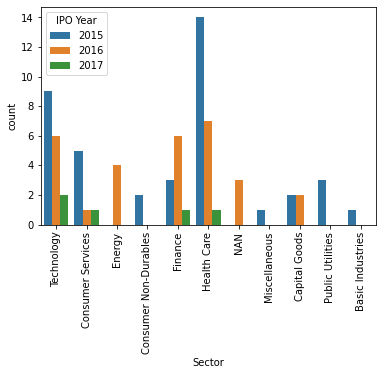

In [20]:
#CountPlot, Multiple Categories

recent_ipos = nasdaq[nasdaq['IPO Year'].astype(float) > 2014.0]
recent_ipos['IPO Year']= recent_ipos['IPO Year'].astype(int)
sns.countplot(x='Sector', hue= 'IPO Year', data = recent_ipos)
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Mean Market Cap')

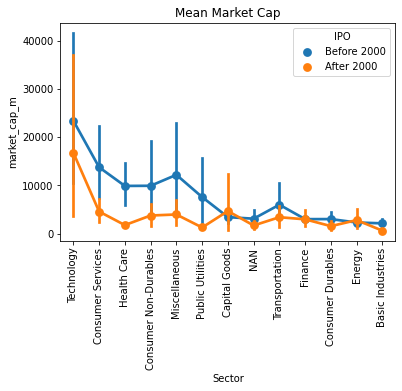

In [21]:
#Compare Stats with PointPlot

nasdaq['IPO']= nasdaq['IPO Year'].astype(float).apply(lambda x: 'After 2000' if x > 2000 else 'Before 2000')
sns.pointplot(x='Sector', y= 'market_cap_m', hue='IPO',data=nasdaq)
plt.xticks(rotation=90);plt.title('Mean Market Cap')

#Distribution by Category

In [23]:
#Clean data: Remove outliers
nasdaq = pd.read_excel('listings.xlsx',sheet_name= 'nasdaq',na_values ='n/a')
nasdaq['market_cap_m']=nasdaq['Market Capitalization'].div(1e6)
nasdaq= nasdaq[nasdaq.market_cap_m>0] #Active companies only
outliers = nasdaq.market_cap_m.quantile(.9) # outlier threshold
nasdaq =nasdaq[nasdaq.market_cap_m< outliers] # remove outliers

/usr/local/lib/python3.8/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

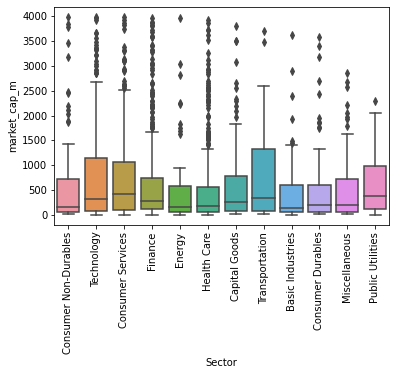

In [24]:
#BoxPlot: Quartiles and Outliers
sns.boxplot(x='Sector',y= 'market_cap_m',data=nasdaq)
plt.xticks(rotation=90)

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 48.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 64.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 58.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 75.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 44.1% of the points cannot be placed; y

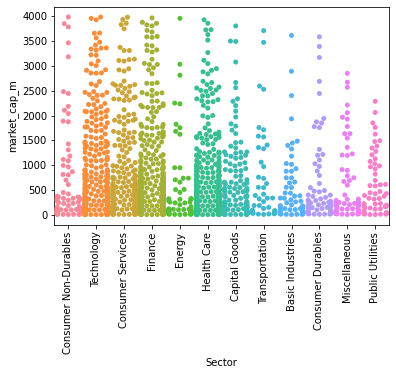

In [27]:
#A variation:SwarmPlot
sns.swarmplot(x='Sector', y='market_cap_m',data=nasdaq)
plt.xticks(rotation=90)
plt.show()